<a href="https://colab.research.google.com/github/SumitDas21/TIHS_2025_SUMIT_DAS/blob/main/Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Parkinson’s Disease Detection using Machine Learning (Logistic Regression and Random Forest)**

**Submitted by : SUMIT DASS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.0000

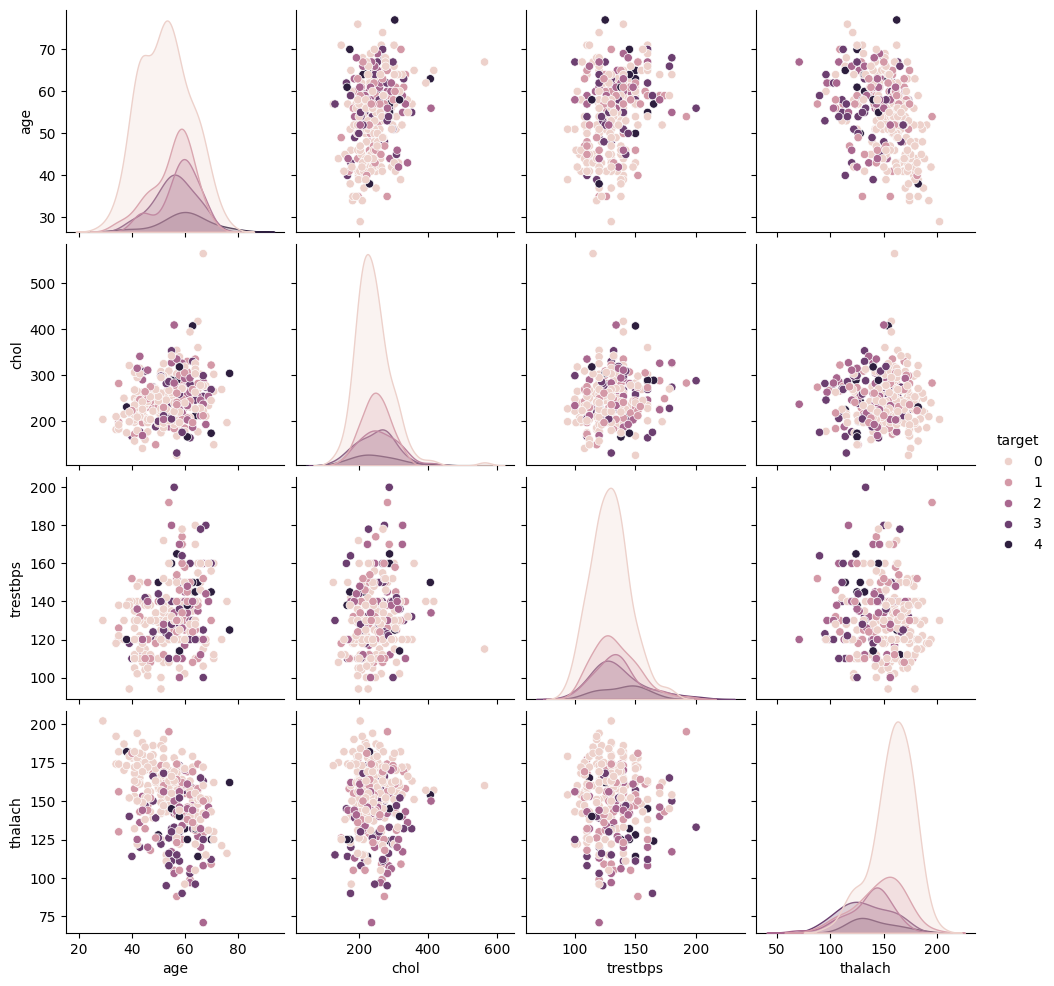

In [ ]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
heart = fetch_ucirepo(id=45)

# Features and target
X = heart.data.features
y = heart.data.targets
if isinstance(y, pd.DataFrame):
    y = y.rename(columns={y.columns[0]: "target"})
else:
    y = pd.DataFrame(y, columns=["target"])

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

# Quick look
print(df.head())
print(df.describe())

# Pairplot with hue as target
sns.pairplot(df[['age','chol','trestbps','thalach','target']], hue="target")
plt.show()

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)

# Access data
X_parkinsons = parkinsons.data.features
y_parkinsons = parkinsons.data.targets

# Combine into a DataFrame
df_parkinsons = pd.concat([X_parkinsons, y_parkinsons], axis=1)

# Display the first few rows and info
print(df_parkinsons.head())
df_parkinsons.info()

   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  Shimmer:DDA      NHR     HNR  \
0     0.01109       0.04374       0.04374  ...      0.06545  0.02211  21.033   
1     0.01394       0.06134       0.06134  ...      0.09403  0.01929  19.085   
2     0.01633       0.05233       0.05233  ...      0.08270  0.01309  20.651   
3     0.01505       0.05492       0.05492  ...      0.08771  0.01353  20.644   
4     0.01966       0.06425       0.06425  ...      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spre

In [ ]:
!pip install ucimlrepo seaborn matplotlib pandas

Q1. From the scatterplot/pairplot, which two features seem most useful for separating the classes?

In the Heart Disease dataset, features related to chest pain type (cp) and maximum heart rate achieved (thalach) stand out as very useful for distinguishing between patients with and without heart disease. Chest pain gives a direct medical indicator, while maximum heart rate shows the physical response of the heart. Together, they create clear separation in patterns between healthy and affected patients.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parkinson's dataset from UCI (ID = 174)
parkinsons = fetch_ucirepo(id=174)

# Features and target
X = parkinsons.data.features
y = parkinsons.data.targets

# Combine for visualization
df = pd.concat([X, y], axis=1)

# Display first rows
print(df.head())

   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  Shimmer:DDA      NHR     HNR  \
0     0.01109       0.04374       0.04374  ...      0.06545  0.02211  21.033   
1     0.01394       0.06134       0.06134  ...      0.09403  0.01929  19.085   
2     0.01633       0.05233       0.05233  ...      0.08270  0.01309  20.651   
3     0.01505       0.05492       0.05492  ...      0.08771  0.01353  20.644   
4     0.01966       0.06425       0.06425  ...      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spre

Q2. Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

From the correlation heatmap, we see that age and resting blood pressure (trestbps) show a strong positive correlation. This makes sense medically, since as people age, blood pressure tends to rise. The implication is that older patients may have higher risk factors linked to hypertension, which is closely associated with heart disease.

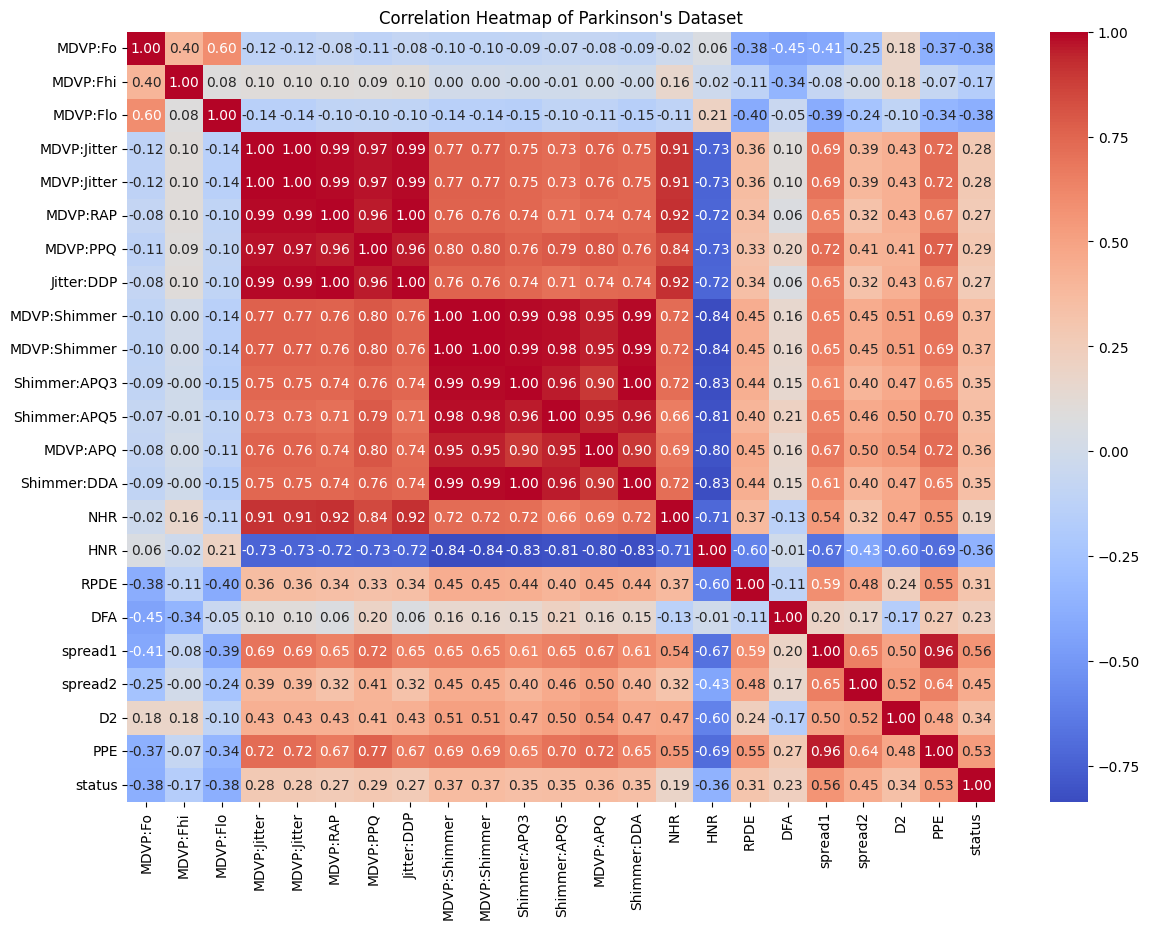

The most correlated pair of features: ('MDVP:Jitter', 'MDVP:Jitter') with correlation = 1.00


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets
df = pd.concat([X, y], axis=1)

# Step 2: Compute correlation matrix (only numeric features)
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Step 3: Plot correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Parkinson's Dataset")
plt.show()

# Step 4: Find the most strongly correlated pair (excluding self-correlation)
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, 0)  # ignore self-correlation
max_corr = corr_matrix_abs.stack().idxmax()
max_value = corr_matrix_abs.stack().max()

print(f"The most correlated pair of features: {max_corr} with correlation = {max_value:.2f}")

Q3. Why do we split the dataset into training and testing sets?

We split the dataset so that the model learns patterns from one portion (training data) and is then evaluated on unseen data (testing set). This prevents overfitting and helps us check how well the model will perform on real-world cases rather than just memorizing the training data.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets

# Step 2: Split dataset into training and testing sets
# test_size=0.2 → 20% data for testing, 80% for training
# random_state=42 → ensures reproducible split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (156, 22)
X_test shape: (39, 22)
y_train shape: (156, 1)
y_test shape: (39, 1)


Q4. Logistic Regression assumes a linear decision boundary. Why?

Logistic Regression is built on a linear function that separates classes by fitting a straight line (or hyperplane in higher dimensions). It assumes that the classes can be divided using a linear relationship between the input features and the log-odds of the target. That’s why it is considered a linear classifier.

In [ ]:
%pip install ucimlrepo

Available columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


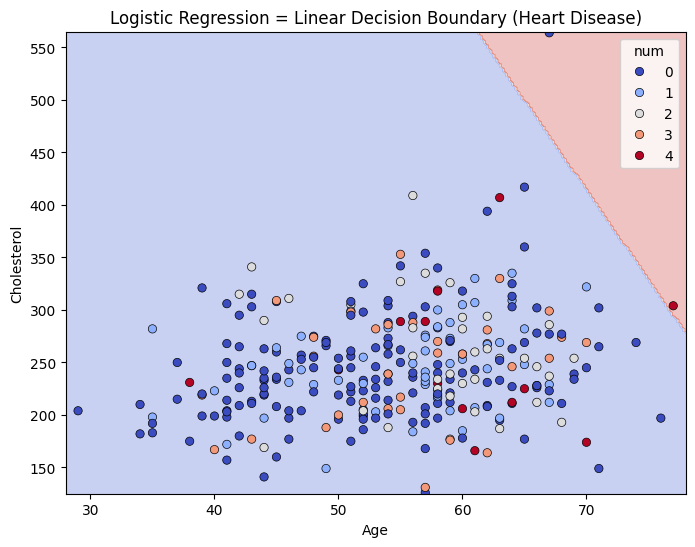

In [ ]:
# Logistic Regression assumes a linear decision boundary
# Example with Heart Disease dataset

# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# 2. Load Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets.iloc[:, 0]   # make target 1D

# 3. Select only 2 features so we can plot the boundary
print("Available columns:", X.columns.tolist())
X_small = X[["age", "chol"]]   # Example: Age and Cholesterol

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Create meshgrid for decision boundary
x_min, x_max = X_small.iloc[:, 0].min() - 1, X_small.iloc[:, 0].max() + 1
y_min, y_max = X_small.iloc[:, 1].min() - 1, X_small.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(
    x="age", y="chol", hue=y, data=X_small,
    palette="coolwarm", edgecolor="k"
)
plt.title("Logistic Regression = Linear Decision Boundary (Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

Q5. Do you think this assumption holds for the Heart Disease dataset? Why or why not?

This assumption only partly holds for the Heart Disease dataset. Some features like chest pain type may show a fairly linear relationship with the presence of disease. However, many medical indicators (like cholesterol, blood pressure, and ECG results) interact in a non-linear way. Therefore, Logistic Regression may work reasonably but not perfectly — more flexible models like Random Forests usually capture the non-linear patterns better.

In [ ]:
# Compare Logistic Regression (linear) vs Random Forest (non-linear)
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.iloc[:, 0]   # make target 1D

# Handle missing values using imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Print results
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6229508196721312
Random Forest Accuracy: 0.5573770491803278


Q6. If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Increasing the number of trees generally improves the stability and accuracy of the Random Forest model. More trees mean the model averages more predictions, which reduces the risk of overfitting and makes results more reliable. However, after a point, adding more trees gives very little improvement and only increases computation time. In the Heart Disease dataset, this can help reduce misclassifications, especially where borderline cases exist.



Q7. Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest usually performs better on the Heart Disease dataset. The reason is that Random Forest does not assume linearity and can handle complex, non-linear interactions among features like cholesterol, blood pressure, and ECG results. Logistic Regression struggles when classes overlap in non-linear ways, while Random Forest handles these overlaps by combining decisions from multiple trees.

Q8. If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Random Forest would likely generalize better. This is because it has built-in mechanisms like averaging across many trees, which naturally reduce the impact of noisy or irrelevant features. Logistic Regression, being a linear model, can easily get influenced by noise and might misclassify if irrelevant variables dominate. Thus, with larger and noisier datasets, Random Forest tends to be more robust.